In [2]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, RandomizedSearchCV, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
import numpy as np
import matplotlib.pyplot as plt
from glob import glob
from os.path import basename
import seaborn as sns
import pandas as pd
from joblib import dump

In [4]:
print("Implementing Random Forest for the following gestures: ")

# Set to complex for complex gestures, simple for simple ones
folder = r'C:\Users\Lenovo\OneDrive\Desktop\motion\accel'
files = list(enumerate(glob(f'{folder}/*.csv')))
for idx, name in files:
    print(f'{idx}: {name}')

Implementing Random Forest for the following gestures: 
0: C:\Users\Lenovo\OneDrive\Desktop\motion\accel\eight.csv
1: C:\Users\Lenovo\OneDrive\Desktop\motion\accel\five.csv
2: C:\Users\Lenovo\OneDrive\Desktop\motion\accel\four.csv
3: C:\Users\Lenovo\OneDrive\Desktop\motion\accel\nine.csv
4: C:\Users\Lenovo\OneDrive\Desktop\motion\accel\one.csv
5: C:\Users\Lenovo\OneDrive\Desktop\motion\accel\seven.csv
6: C:\Users\Lenovo\OneDrive\Desktop\motion\accel\six.csv
7: C:\Users\Lenovo\OneDrive\Desktop\motion\accel\three.csv
8: C:\Users\Lenovo\OneDrive\Desktop\motion\accel\two.csv
9: C:\Users\Lenovo\OneDrive\Desktop\motion\accel\zero.csv


Visualising pairplots for each column in each gesture file.


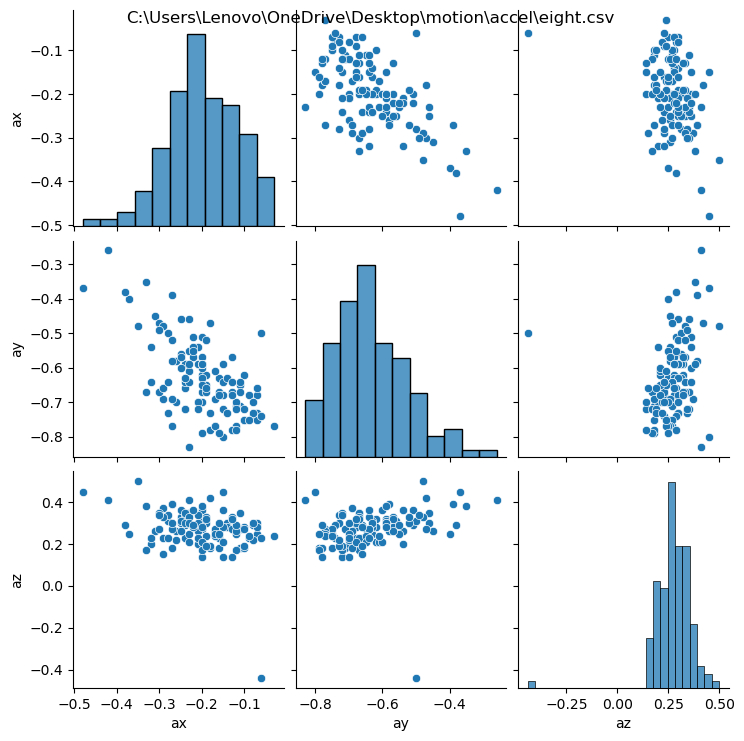

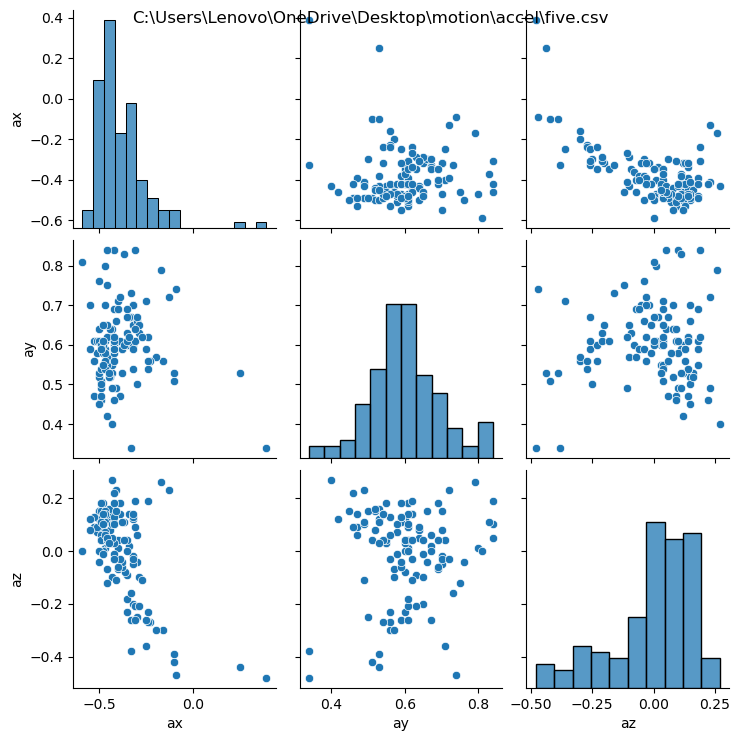

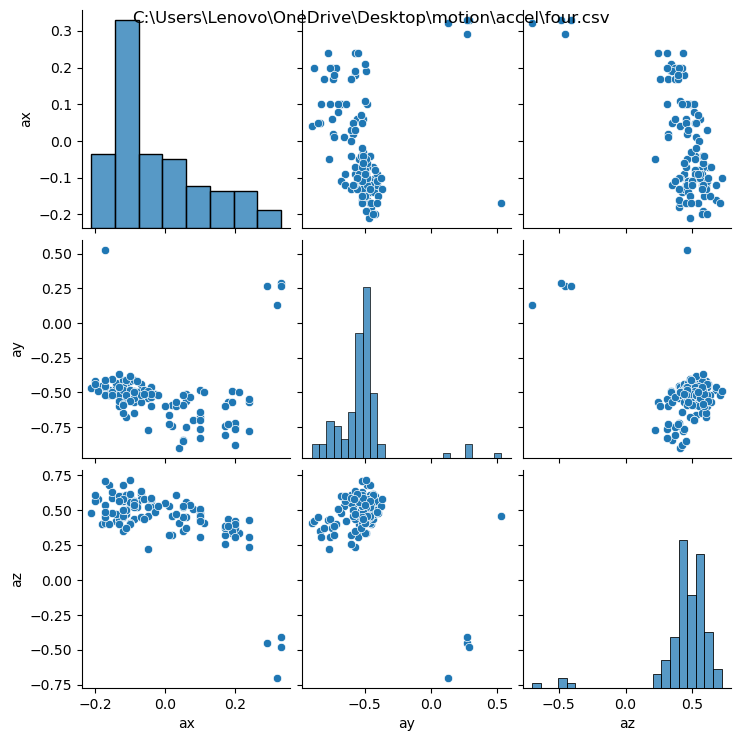

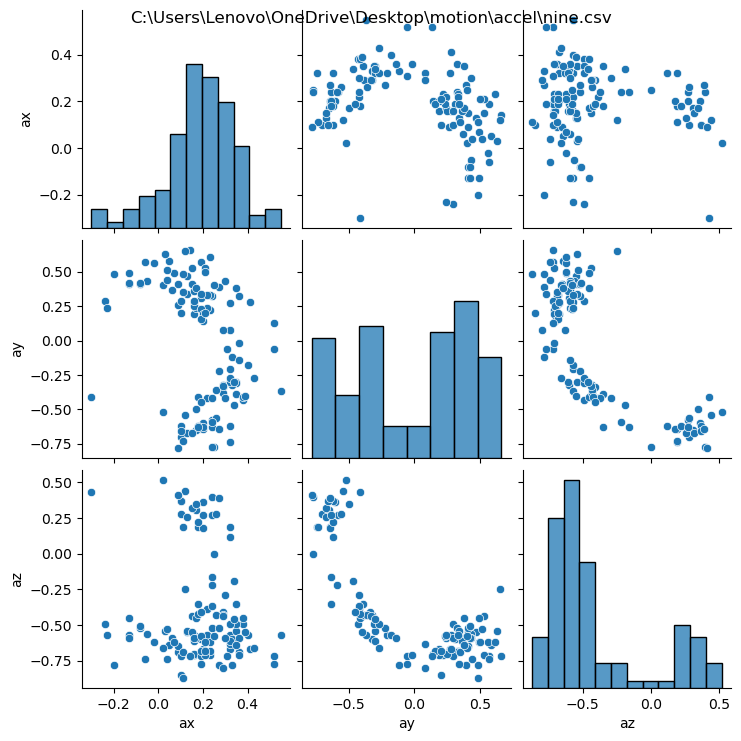

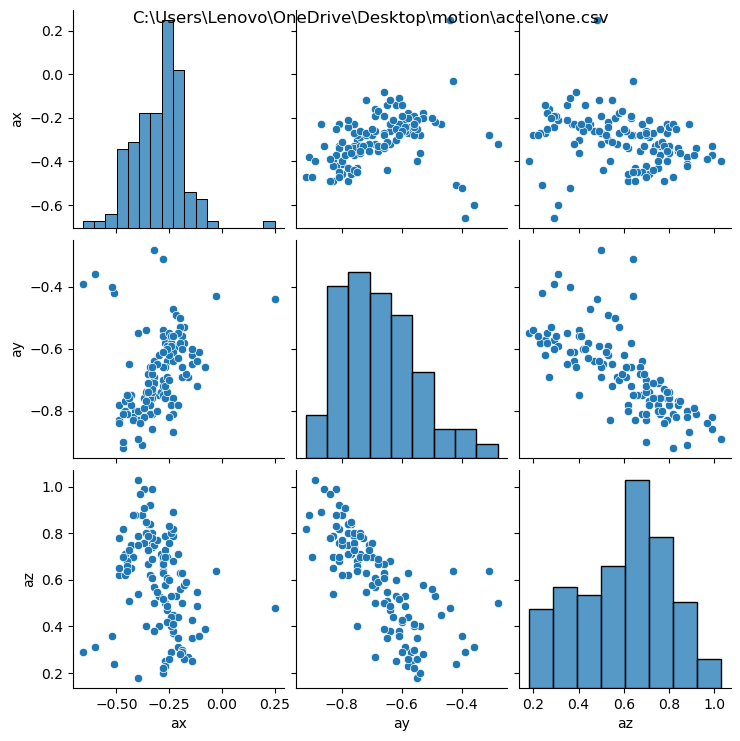

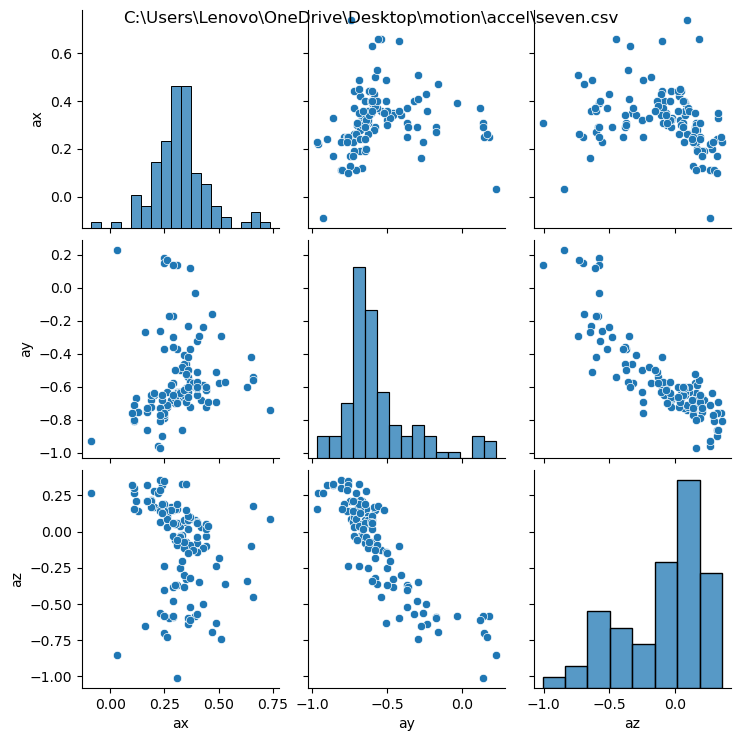

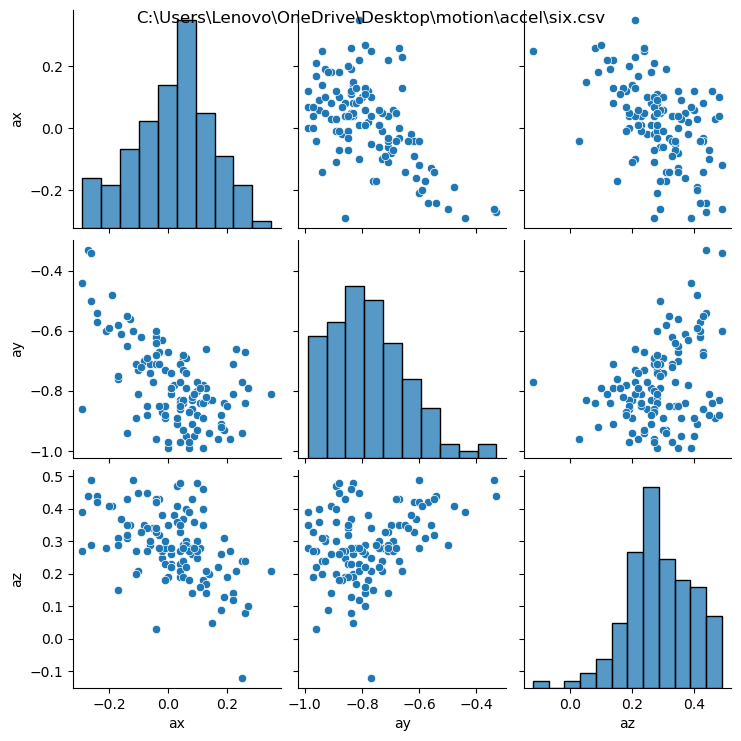

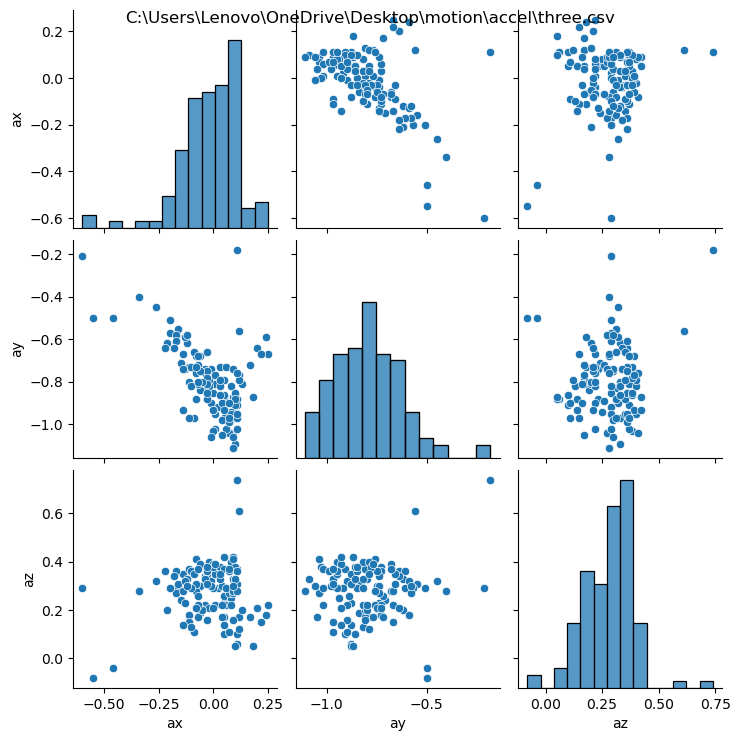

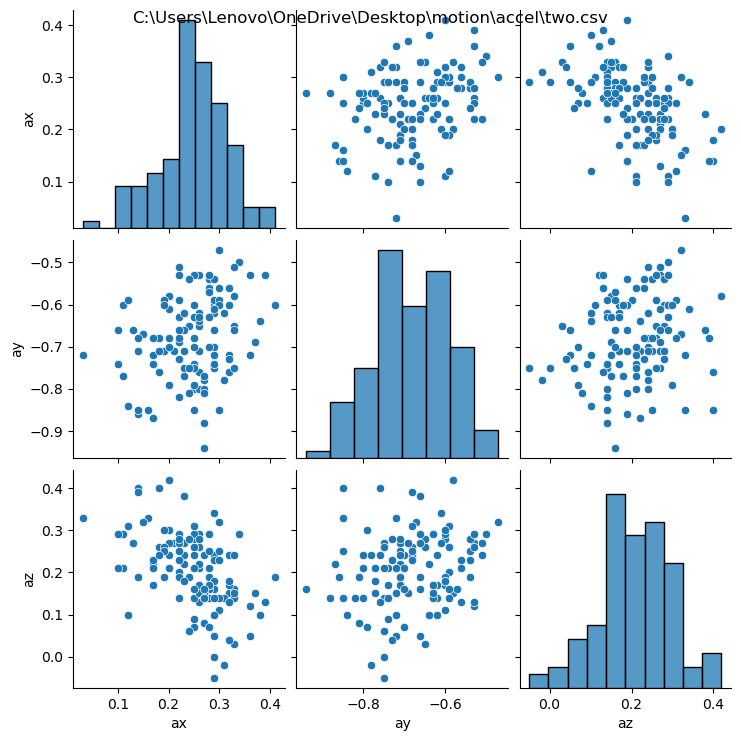

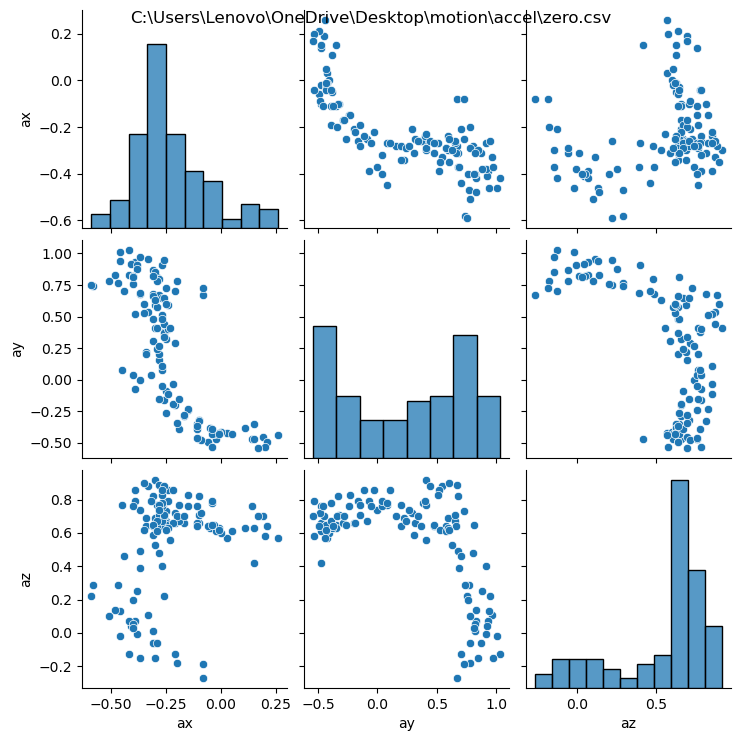

In [5]:
# uncomment for simple gestures to plot pairplots

print("Visualising pairplots for each column in each gesture file.")

for _, path in files:
    df = pd.read_csv(path, names = ['ax', 'ay', 'az'])
    sns.pairplot(df, height=2.5).figure.suptitle(path)

Visualising correlation histograms for each column in each gesture file.


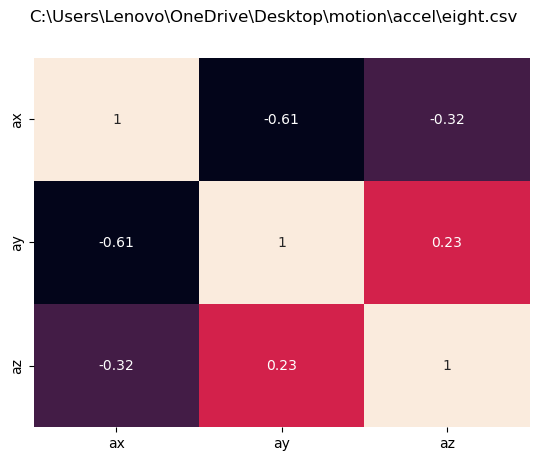

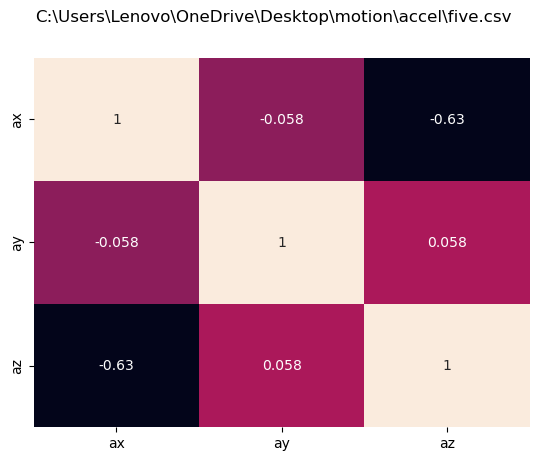

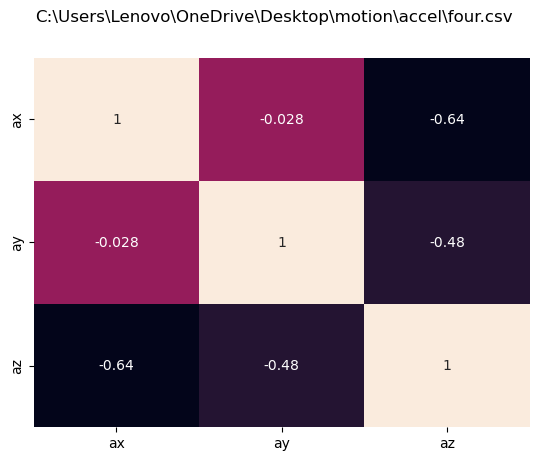

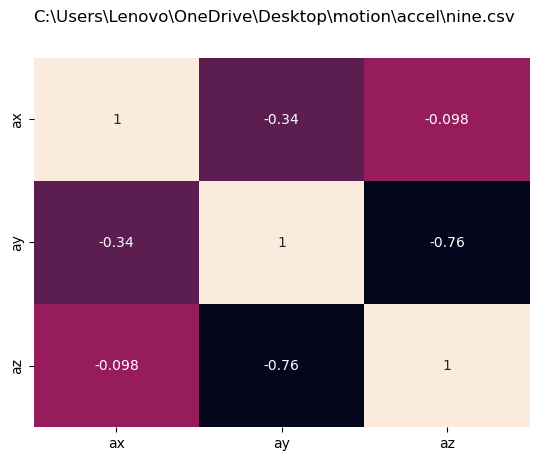

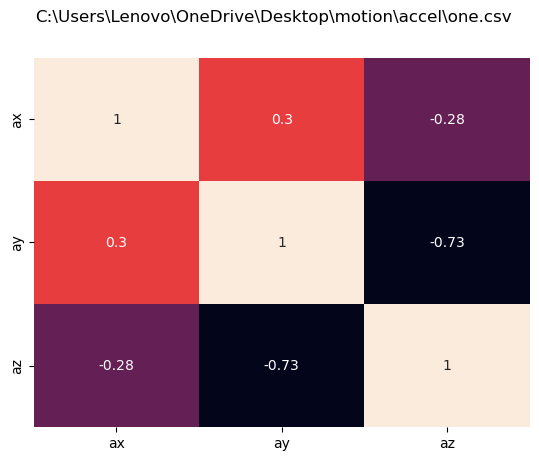

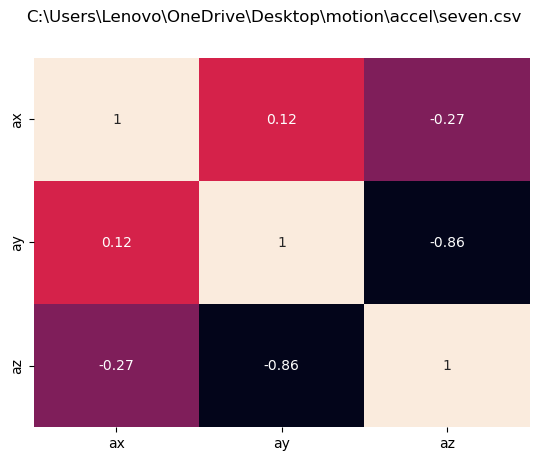

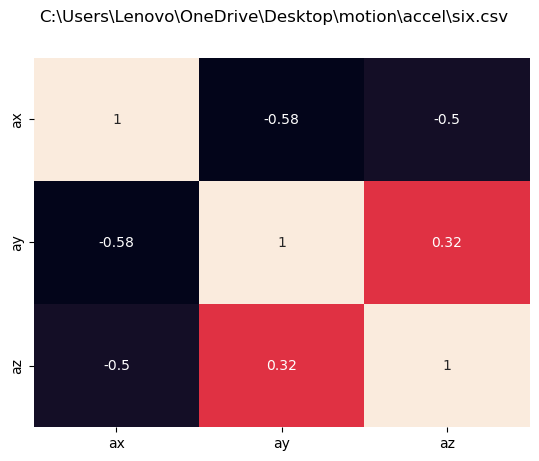

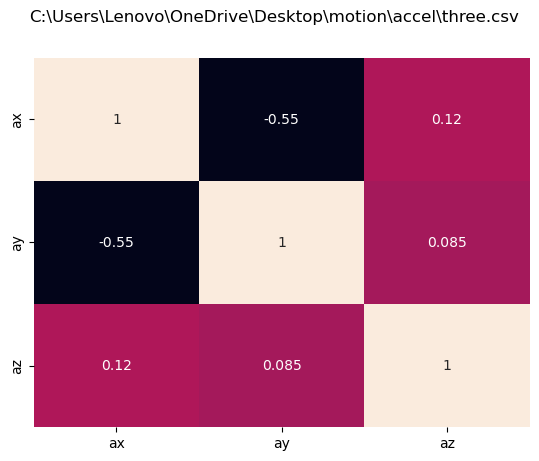

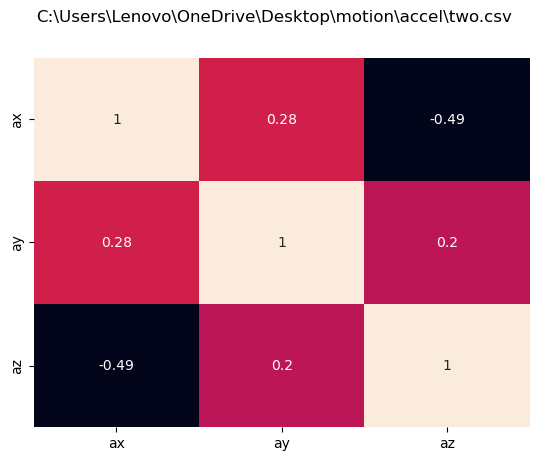

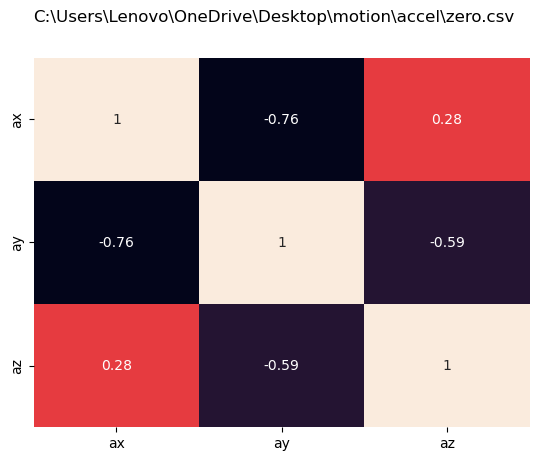

In [6]:
# uncomment for simple gestures to plot correlation histograms

print("Visualising correlation histograms for each column in each gesture file.")

for _, path in files:
    df = pd.read_csv(path, names = ['ax', 'ay', 'az'])
    corr = df.corr()
    sns.heatmap(corr, annot=True, cbar=False).figure.suptitle(path)
    plt.show()

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_25976\1866478528.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_final = df_final.append(means)
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_25976\1866478528.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_final = df_final.append(means)
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_25976\1866478528.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_final = df_final.append(means)
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_25976\1866478528.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_final = df_final.append(means)
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_25976\1

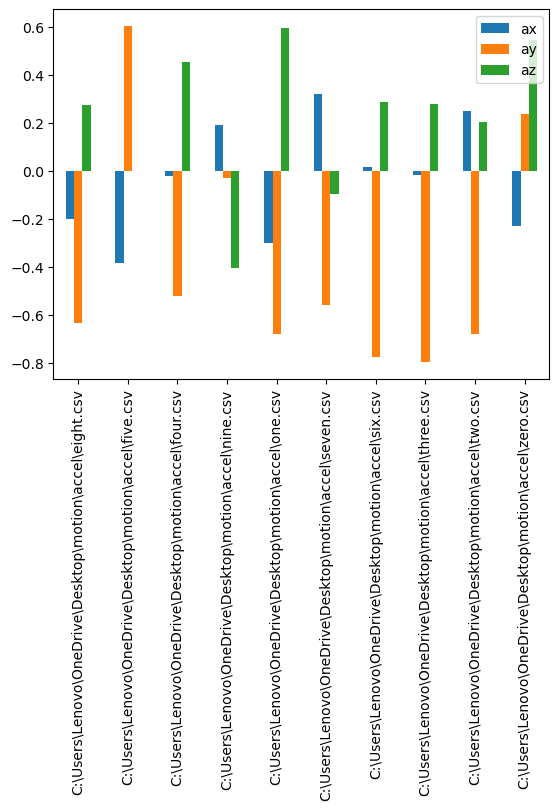

In [7]:
df_final = pd.DataFrame()
for _, path in files:
    means = pd.read_csv(path, names = ['ax', 'ay', 'az']).mean()
    means.name = path
    df_final = df_final.append(means)
df_final.plot(kind='bar')
plt.show()

In [22]:
# initialize variables
# for when using the array with 200 features uncomment 
folder = r'C:\Users\Lenovo\OneDrive\Desktop\motion\ML'
files = list(enumerate(glob(f'{folder}/*.csv')))
features = None
classes = {}

# for each file
for i, file in files:
    
    # map gesture to its index, e.g. 1 -> up
    print(file)
    gesture = basename(file)
    classes[i] = gesture
    
    # load data and set output labels to index of gesture
    data = np.loadtxt(file, dtype=float, delimiter=',')
    labels = np.ones((len(data), 1)) * i
    data = np.hstack((data, labels))
    
    # append data to final variable
    features = data if features is None else np.vstack((features, data))

# set raw data and output vector
X, y = features[:, :-1], features[:, -1]

C:\Users\Lenovo\OneDrive\Desktop\motion\ML\eight.csv
C:\Users\Lenovo\OneDrive\Desktop\motion\ML\five.csv
C:\Users\Lenovo\OneDrive\Desktop\motion\ML\four.csv
C:\Users\Lenovo\OneDrive\Desktop\motion\ML\nine.csv
C:\Users\Lenovo\OneDrive\Desktop\motion\ML\one.csv
C:\Users\Lenovo\OneDrive\Desktop\motion\ML\seven.csv
C:\Users\Lenovo\OneDrive\Desktop\motion\ML\six.csv
C:\Users\Lenovo\OneDrive\Desktop\motion\ML\three.csv
C:\Users\Lenovo\OneDrive\Desktop\motion\ML\two.csv
C:\Users\Lenovo\OneDrive\Desktop\motion\ML\zero.csv


In [23]:
print("Splitting data into 30% test and 70% training vectors.")

# split data into training and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

# initialize and train the classifying model
print("Training random forest classifying model.")
classifier = RandomForestClassifier(n_estimators=100, max_depth=10).fit(X_train, y_train)
y_pred=classifier.predict(X_test)

# generate classification report
print("\n----------------RESULTS----------------\n")
classification = metrics.classification_report(y_test,y_pred)
print(f"Zero-one loss: {metrics.zero_one_loss(y_test,y_pred):.2}")
print(f"Accuracy score: {classifier.score(X_test, y_test):.2}\n")
print(classification)

Splitting data into 30% test and 70% training vectors.
Training random forest classifying model.

----------------RESULTS----------------

Zero-one loss: 0.23
Accuracy score: 0.77

              precision    recall  f1-score   support

         0.0       0.40      0.50      0.44         4
         1.0       1.00      0.57      0.73         7
         2.0       0.50      0.83      0.62         6
         3.0       0.75      0.75      0.75         4
         4.0       0.75      0.86      0.80         7
         5.0       0.83      1.00      0.91         5
         6.0       1.00      0.75      0.86         8
         7.0       0.67      1.00      0.80         4
         8.0       1.00      0.75      0.86         8
         9.0       1.00      0.71      0.83         7

    accuracy                           0.77        60
   macro avg       0.79      0.77      0.76        60
weighted avg       0.83      0.77      0.78        60



In [24]:
params = {
    'n_estimators': [20, 30, 50, 75, 100],#, 100, 250, 500, 1000],
    'max_depth': [1, 5, 10],#, 20],
    'min_samples_split': [2, 5],#, 10],
    'min_samples_leaf': [1, 2, 5],
    'criterion': ['gini', 'entropy'],
    'bootstrap': [True, False],
    'max_features': ['auto', 'sqrt'] 
}

print("Training model for different combinations of parameters to find the best one.")
print("This process will tune the model by brute-forcing through every permutation of hyperparameters and retraining to find the ideal hyperparameters.")
print(f"\nParameters being brute-forced through: {params}\n")
print("\n-----------------------------\n")

rf_grid = RandomForestClassifier()

# Instantiate the grid search model
grid_rf_search = GridSearchCV(estimator = rf_grid, param_grid = params, 
                          cv = 5, n_jobs = 8, verbose = 1)
grid_rf_search.fit(X_train, y_train)

Training model for different combinations of parameters to find the best one.
This process will tune the model by brute-forcing through every permutation of hyperparameters and retraining to find the ideal hyperparameters.

Parameters being brute-forced through: {'n_estimators': [20, 30, 50, 75, 100], 'max_depth': [1, 5, 10], 'min_samples_split': [2, 5], 'min_samples_leaf': [1, 2, 5], 'criterion': ['gini', 'entropy'], 'bootstrap': [True, False], 'max_features': ['auto', 'sqrt']}


-----------------------------

Fitting 5 folds for each of 720 candidates, totalling 3600 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=8,
             param_grid={'bootstrap': [True, False],
                         'criterion': ['gini', 'entropy'],
                         'max_depth': [1, 5, 10],
                         'max_features': ['auto', 'sqrt'],
                         'min_samples_leaf': [1, 2, 5],
                         'min_samples_split': [2, 5],
                         'n_estimators': [20, 30, 50, 75, 100]},
             verbose=1)

In [25]:
print(f'Best parameters after grid search: {grid_rf_search.best_params_}')
print(f'Score on training data after grid search: {grid_rf_search.score(X_train, y_train)}')
print(f'Score on test data after grid search: {grid_rf_search.score(X_test, y_test):.3}')

Best parameters after grid search: {'bootstrap': True, 'criterion': 'gini', 'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Score on training data after grid search: 1.0
Score on test data after grid search: 0.75


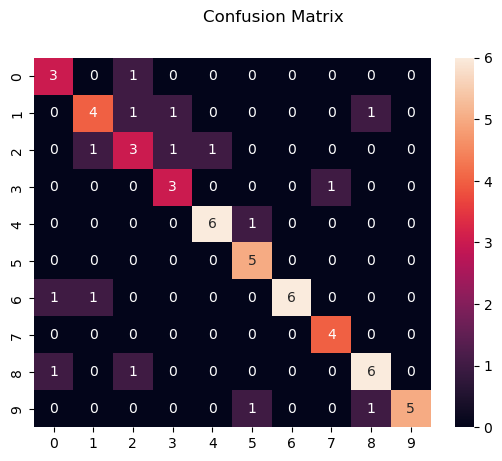

In [26]:
from sklearn.metrics import confusion_matrix

y_pred = grid_rf_search.predict(X_test)
confusion_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(confusion_matrix, annot=True, cbar=True).figure.suptitle("Confusion Matrix")
plt.show()

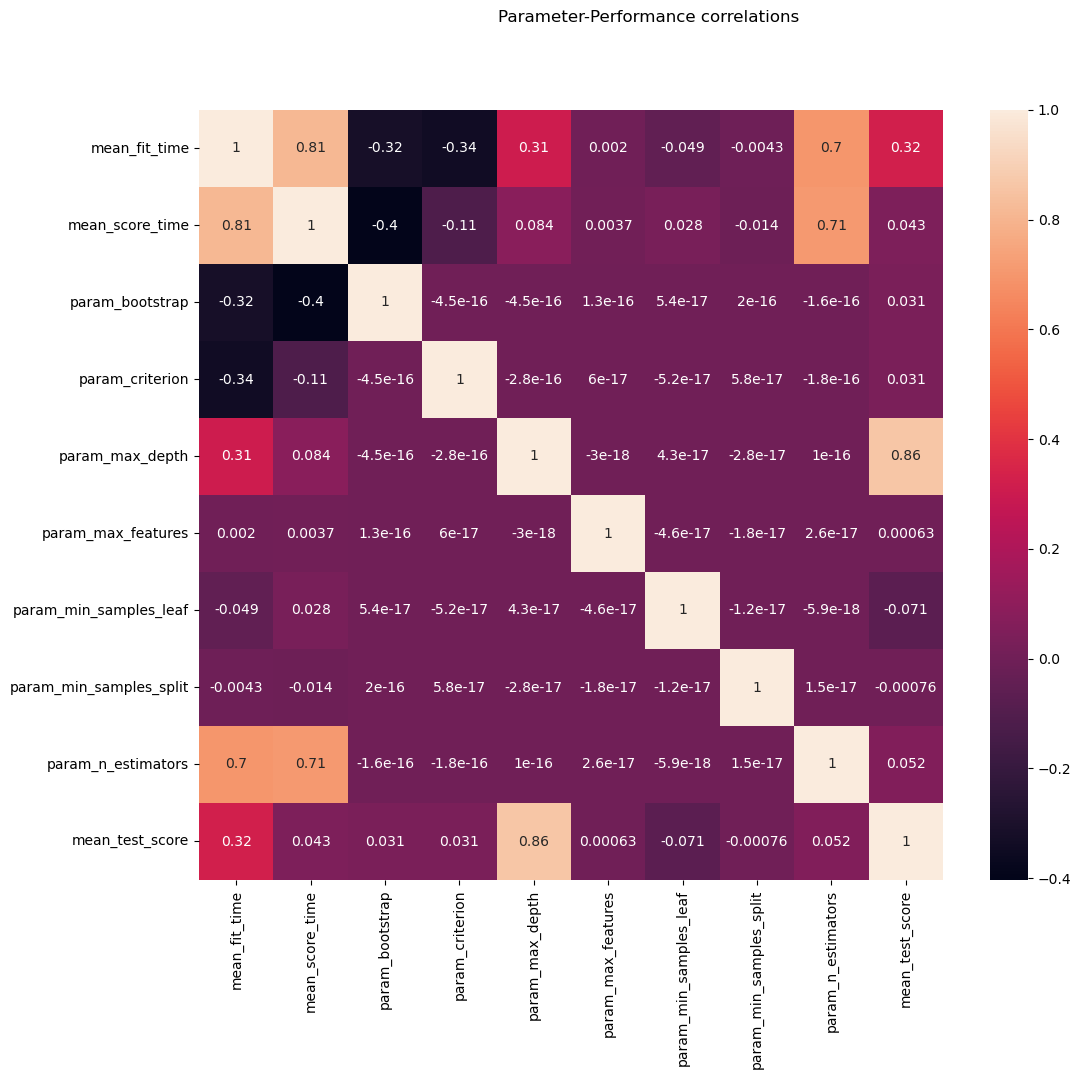

In [27]:
data = pd.DataFrame(grid_rf_search.cv_results_)

from sklearn.preprocessing import OrdinalEncoder
ord_enc = OrdinalEncoder()
data["param_bootstrap"] = ord_enc.fit_transform(data[["param_bootstrap"]])
data["param_criterion"] = ord_enc.fit_transform(data[["param_criterion"]])
data["param_n_estimators"] = ord_enc.fit_transform(data[["param_n_estimators"]])
data["param_max_features"] = ord_enc.fit_transform(data[["param_max_features"]])
data["param_max_depth"] = ord_enc.fit_transform(data[["param_max_depth"]])
data["param_min_samples_leaf"] = ord_enc.fit_transform(data[["param_min_samples_leaf"]])
data["param_min_samples_split"] = ord_enc.fit_transform(data[["param_min_samples_split"]])
data = data.drop("params", axis=1) \
    .drop("split0_test_score", axis=1) \
    .drop("split1_test_score", axis=1) \
    .drop("split2_test_score", axis=1) \
    .drop("split3_test_score", axis=1) \
    .drop("split4_test_score", axis=1) \
    .drop("std_fit_time", axis=1) \
    .drop("std_score_time", axis=1) \
    .drop("std_test_score", axis=1) \
    .drop("rank_test_score", axis=1)

plt.figure(figsize = (12,10))
sns.heatmap(data.corr(), annot=True).figure.suptitle("Parameter-Performance correlations")
plt.show()

In [28]:
print(f"Dumping the tuned model to {folder}_trained_model.joblib file")
_ = dump(grid_rf_search, f'{folder}_trained_model.joblib')

Dumping the tuned model to C:\Users\Lenovo\OneDrive\Desktop\motion\ML_trained_model.joblib file
